In [1]:
import pandas as pd
import re

In [7]:
with open('Pohojie_akkaunty_instagram.txt', 'r', encoding='utf-8') as fin:
    arr = [i.strip() for i in fin.readlines() if any([j.isdigit() for j in i])]

In [12]:
arr2 = [''.join([j for j in i if j.isdigit()]) for i in arr]

In [13]:
arr

['77889815',
 '+79315835532',
 '89818789616',
 '+79213158648',
 '89118736407',
 '79119919791',
 '+79315319591',
 '+79119211380',
 '358469081999',
 '89688834086',
 '301-04-37',
 '89874890794',
 '8-981-703-63-14 СПб',
 '89818864023',
 '91782800',
 '+7(705)6082844',
 '79887007806',
 '891777077**',
 '899921979..',
 '+7(952)3831725',
 '89622814765',
 '79312781396',
 '8909303333',
 '+79817970892',
 '+7495994****',
 '+7 952 388 79 00',
 '89052333353',
 '375173939324',
 '+79119570200',
 '9531621515',
 '2222233223322',
 '89312029060',
 '89112555662',
 '89217718505',
 '+9522614954',
 '89045124618',
 '89110974254',
 '+79818561237',
 '89817415853',
 '89046372220',
 '89312071882',
 'Siemens Gigaset A 165',
 '89185706411',
 '89145030461',
 '+79675716720',
 '89127344565',
 '79858590257',
 '+7(909)5617555',
 '+79111723886',
 '717-35-98',
 '89818595548',
 '89523093730',
 '423678112608317',
 '890583697**',
 '44',
 '+79213480125',
 '89062285186',
 '+79509221192',
 '89533632887',
 '89531613432',
 '7*6***'

In [16]:
arr2 = [i for i in arr2 if len(i) >= 7]

In [19]:
arr2

['77889815',
 '79315835532',
 '89818789616',
 '79213158648',
 '89118736407',
 '79119919791',
 '79315319591',
 '79119211380',
 '358469081999',
 '89688834086',
 '3010437',
 '89874890794',
 '89817036314',
 '89818864023',
 '91782800',
 '77056082844',
 '79887007806',
 '891777077',
 '899921979',
 '79523831725',
 '89622814765',
 '79312781396',
 '8909303333',
 '79817970892',
 '7495994',
 '79523887900',
 '89052333353',
 '375173939324',
 '79119570200',
 '9531621515',
 '2222233223322',
 '89312029060',
 '89112555662',
 '89217718505',
 '9522614954',
 '89045124618',
 '89110974254',
 '79818561237',
 '89817415853',
 '89046372220',
 '89312071882',
 '89185706411',
 '89145030461',
 '79675716720',
 '89127344565',
 '79858590257',
 '79095617555',
 '79111723886',
 '7173598',
 '89818595548',
 '89523093730',
 '423678112608317',
 '890583697',
 '79213480125',
 '89062285186',
 '79509221192',
 '89533632887',
 '89531613432',
 '89276057467',
 '89504565',
 '23456789',
 '8913168',
 '89523880215',
 '0969093355',
 '8952

In [20]:
phones = arr2.copy()

In [21]:
pattern = r'\(\d{2}\)'
pattern2 = r'[а-яА-Яa-zA-Z]{1}'

for i, j in enumerate(phones):
    if len([x for x in j if x.isdigit()]) == 10:
        phones[i] = '7' + ''.join([x for x in j if x.isdigit()])    
    if len([x for x in j if x.isdigit()]) == 11:
        temp_arr = ''.join([x for x in j if x.isdigit()])
        if temp_arr[0] == '8':
            phones[i] = '7' + temp_arr[1:]
        elif temp_arr[0] == '7':    
            phones[i] = temp_arr

for i, j in enumerate(phones):
    if re.search(pattern, j):
        if '(61)' in j:
            phones[i] = phones[i].replace('(61)', ', 321-61-61, ')
        elif  '(39)' in j:   
            phones[i] = phones[i].replace('(39)', ', 305-73-39, ')
        elif '(73)' in j:
            phones[i] = phones[i].replace('(73)', '')
            phones[i] += ' , 558-73-09 '
        elif ('21') in j:
            phones[i] = phones[i].replace('(21)', '(921)')
    phones[i] = ''.join([x if x not in ',;!:.\\/+' else ' ' for x in j])        
    phones[i] = phones[i].lstrip(' ')
    phones[i] = phones[i].rstrip(' ')
    if re.search(pattern2, phones[i]):
        phones[i] = re.sub(pattern2, '', phones[i])
    phones[i] = ''.join([x for x in phones[i] if x not in '()-']) 

In [22]:
phones2 = phones.copy()
phones2

['77889815',
 '79315835532',
 '79818789616',
 '79213158648',
 '79118736407',
 '79119919791',
 '79315319591',
 '79119211380',
 '358469081999',
 '79688834086',
 '3010437',
 '79874890794',
 '79817036314',
 '79818864023',
 '91782800',
 '77056082844',
 '79887007806',
 '891777077',
 '899921979',
 '79523831725',
 '79622814765',
 '79312781396',
 '78909303333',
 '79817970892',
 '7495994',
 '79523887900',
 '79052333353',
 '375173939324',
 '79119570200',
 '79531621515',
 '2222233223322',
 '79312029060',
 '79112555662',
 '79217718505',
 '79522614954',
 '79045124618',
 '79110974254',
 '79818561237',
 '79817415853',
 '79046372220',
 '79312071882',
 '79185706411',
 '79145030461',
 '79675716720',
 '79127344565',
 '79858590257',
 '79095617555',
 '79111723886',
 '7173598',
 '79818595548',
 '79523093730',
 '423678112608317',
 '890583697',
 '79213480125',
 '79062285186',
 '79509221192',
 '79533632887',
 '79531613432',
 '79276057467',
 '89504565',
 '23456789',
 '8913168',
 '79523880215',
 '70969093355',
 '

In [23]:
for i, j in enumerate(phones2):
    phones2[i] = j.split()

In [24]:
from functools import reduce
for i, j in enumerate(phones2):
    try:
        phones2[i].append(reduce(lambda x, y: x + y, [z for z in j if len(z) < 7]))
    except:
        continue

In [25]:
for i, j in enumerate(phones2):
    for x, y in enumerate(j):
        if x != len(j) - 1:
            if len(y) == 4 and len(j[x + 1]) == 7 and y[:2] in ('79', '89'):
                    phones2[i].append(y + j[x + 1])
            elif y in ('7', '8') and len(j[x + 1]) == 10:
                phones2[i].append(y + j[x + 1])

In [26]:
for i, j in enumerate(phones2):
    phones2[i] = [x for x in phones2[i] if len(x) >= 7]

In [27]:
for i, j in enumerate(phones2):
    for x, y in enumerate(j):
        if len(y) == 7:
            phones2[i][x] = '7812' + phones2[i][x]
        elif len(y) == 11 and y[0] == '8':
            phones2[i][x] = '7' + y[1:]
        elif len(y) == 10:
            phones2[i][x] = '7' + y

In [28]:
phones2

[['77889815'],
 ['79315835532'],
 ['79818789616'],
 ['79213158648'],
 ['79118736407'],
 ['79119919791'],
 ['79315319591'],
 ['79119211380'],
 ['358469081999'],
 ['79688834086'],
 ['78123010437'],
 ['79874890794'],
 ['79817036314'],
 ['79818864023'],
 ['91782800'],
 ['77056082844'],
 ['79887007806'],
 ['891777077'],
 ['899921979'],
 ['79523831725'],
 ['79622814765'],
 ['79312781396'],
 ['78909303333'],
 ['79817970892'],
 ['78127495994'],
 ['79523887900'],
 ['79052333353'],
 ['375173939324'],
 ['79119570200'],
 ['79531621515'],
 ['2222233223322'],
 ['79312029060'],
 ['79112555662'],
 ['79217718505'],
 ['79522614954'],
 ['79045124618'],
 ['79110974254'],
 ['79818561237'],
 ['79817415853'],
 ['79046372220'],
 ['79312071882'],
 ['79185706411'],
 ['79145030461'],
 ['79675716720'],
 ['79127344565'],
 ['79858590257'],
 ['79095617555'],
 ['79111723886'],
 ['78127173598'],
 ['79818595548'],
 ['79523093730'],
 ['423678112608317'],
 ['890583697'],
 ['79213480125'],
 ['79062285186'],
 ['79509221192

In [29]:
phones2 = [i[0] for i in phones2]
phones2

['77889815',
 '79315835532',
 '79818789616',
 '79213158648',
 '79118736407',
 '79119919791',
 '79315319591',
 '79119211380',
 '358469081999',
 '79688834086',
 '78123010437',
 '79874890794',
 '79817036314',
 '79818864023',
 '91782800',
 '77056082844',
 '79887007806',
 '891777077',
 '899921979',
 '79523831725',
 '79622814765',
 '79312781396',
 '78909303333',
 '79817970892',
 '78127495994',
 '79523887900',
 '79052333353',
 '375173939324',
 '79119570200',
 '79531621515',
 '2222233223322',
 '79312029060',
 '79112555662',
 '79217718505',
 '79522614954',
 '79045124618',
 '79110974254',
 '79818561237',
 '79817415853',
 '79046372220',
 '79312071882',
 '79185706411',
 '79145030461',
 '79675716720',
 '79127344565',
 '79858590257',
 '79095617555',
 '79111723886',
 '78127173598',
 '79818595548',
 '79523093730',
 '423678112608317',
 '890583697',
 '79213480125',
 '79062285186',
 '79509221192',
 '79533632887',
 '79531613432',
 '79276057467',
 '89504565',
 '23456789',
 '78128913168',
 '79523880215',
 '

In [30]:
phones3 = ['7' + i[1:] if i[0] == '8' else i for i in phones2]

In [32]:
phones3 = [i for i in phones3 if len(i) == 11]

In [35]:
phones3 = [i for i in phones3 if i[0] == '7']

In [38]:
data = pd.Series(phones3, name='phones')

In [39]:
data

0        79315835532
1        79818789616
2        79213158648
3        79118736407
4        79119919791
            ...     
13507    79500378028
13508    78123669999
13509    79267527142
13510    79217975730
13511    79116311550
Name: phones, Length: 13512, dtype: object

In [40]:
data2 = pd.DataFrame(data)

In [41]:
data2

,phones
0,79315835532
1,79818789616
2,79213158648
3,79118736407
4,79119919791
...,...
13507,79500378028
13508,78123669999
13509,79267527142
13510,79217975730


In [43]:
data2.to_excel('output.xlsx', index=None)

In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [77]:
arr = np.random.randn(1000)

arr = np.random.normal(size=10000)

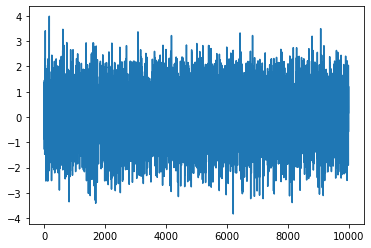

In [78]:
plt.plot(arr)

In [79]:
arr.min()

-3.832219518967175

In [80]:
data = pd.DataFrame(arr)

In [81]:
data.rename(columns = {0 : 'random'}, inplace=True)

In [84]:
arr.cumsum().max()

175.49690909603802